In [2]:
import numpy as np
a = np.array([1, 2])
b = np.array([3, 4])
np.concatenate((a, b))

array([1, 2, 3, 4])

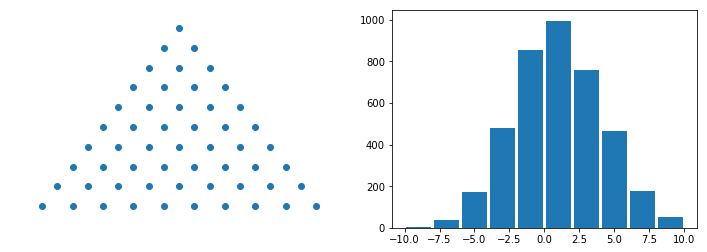

In [3]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np


NUM_ROWS = 10
NUM_TRIALS = 4000
PROB_RIGHT = 0.5


# Compute trials
went_right = np.random.sample([NUM_TRIALS, NUM_ROWS]) < PROB_RIGHT
trials = np.where(went_right, 1, -1)
destinations = trials.sum(axis=1)
paths = trials.cumsum(axis=1)

# Prepare figure
fig, (ax_board, ax_dest) = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
ax_board.set_xlim(-NUM_ROWS, NUM_ROWS)
ax_board.axis('off')

# Plot pegs
pegs_x = np.concatenate([np.linspace(-row, row, num=(row + 1))
                        for row in range(NUM_ROWS)])
pegs_y = np.repeat(range(NUM_ROWS, 0, -1), range(1, NUM_ROWS + 1))
ax_board.scatter(pegs_x, pegs_y)

# Plot paths
paths_x = np.concatenate((np.zeros((NUM_TRIALS, 1)), paths), axis=1)
path_y = np.linspace(NUM_ROWS, 0, num=(NUM_ROWS + 1)) + 0.4
ax_board.plot(paths_x.T, path_y,
         color=(0, 0.9, 0.3, 3 / NUM_TRIALS),
         linewidth=3);

# Plot destinations histogram
bins = np.arange(-NUM_ROWS, NUM_ROWS + 2, 2)
ax_dest.hist(destinations, bins=bins, rwidth=0.9);